In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Top League(s) Footballer Stats 2000-2023

 ![](https://cdn.wallpapersafari.com/61/77/Kg90dv.jpg)

### This dataset contains stats on players from top 7 European football leagues: EPL, Bundesliga, La Liga, Serie A, League 1, Ere Divisie and Primeira Liga, from as early as 2000! (Different datasets are only available for some years) This is one of the largest soccer/football datasets on Kaggle, and also includes advanced metrics from Opta. This notebook will be taking a look at specifically the offensive datasets to see who are the best attacking footballers of the last two decades. Certain parts of this notebook will disclude players who played in the Ere Divise or the Primeria Liga since they are not considered Top5 Leagues generally, however I personally believe they are both better than the French League. 

It's worth noting that this dataset does NOT include the Champions League / Europa League.

### Let's get started!

# Reading the Data: 

In [2]:
shooting = pd.read_csv('/kaggle/input/top-league-footballer-stats-2000-2023-seasons/shooting.csv')
creating = pd.read_csv('/kaggle/input/top-league-footballer-stats-2000-2023-seasons/goal_and_shot_creation.csv')
passing = pd.read_csv('/kaggle/input/top-league-footballer-stats-2000-2023-seasons/passing.csv')
standard = pd.read_csv('/kaggle/input/top-league-footballer-stats-2000-2023-seasons/standard_stats.csv')

# Goals Per League Over Time

Text(0.0, 1.0, 'Goals Per Season Across Big 5 Leagues 2000-2022')

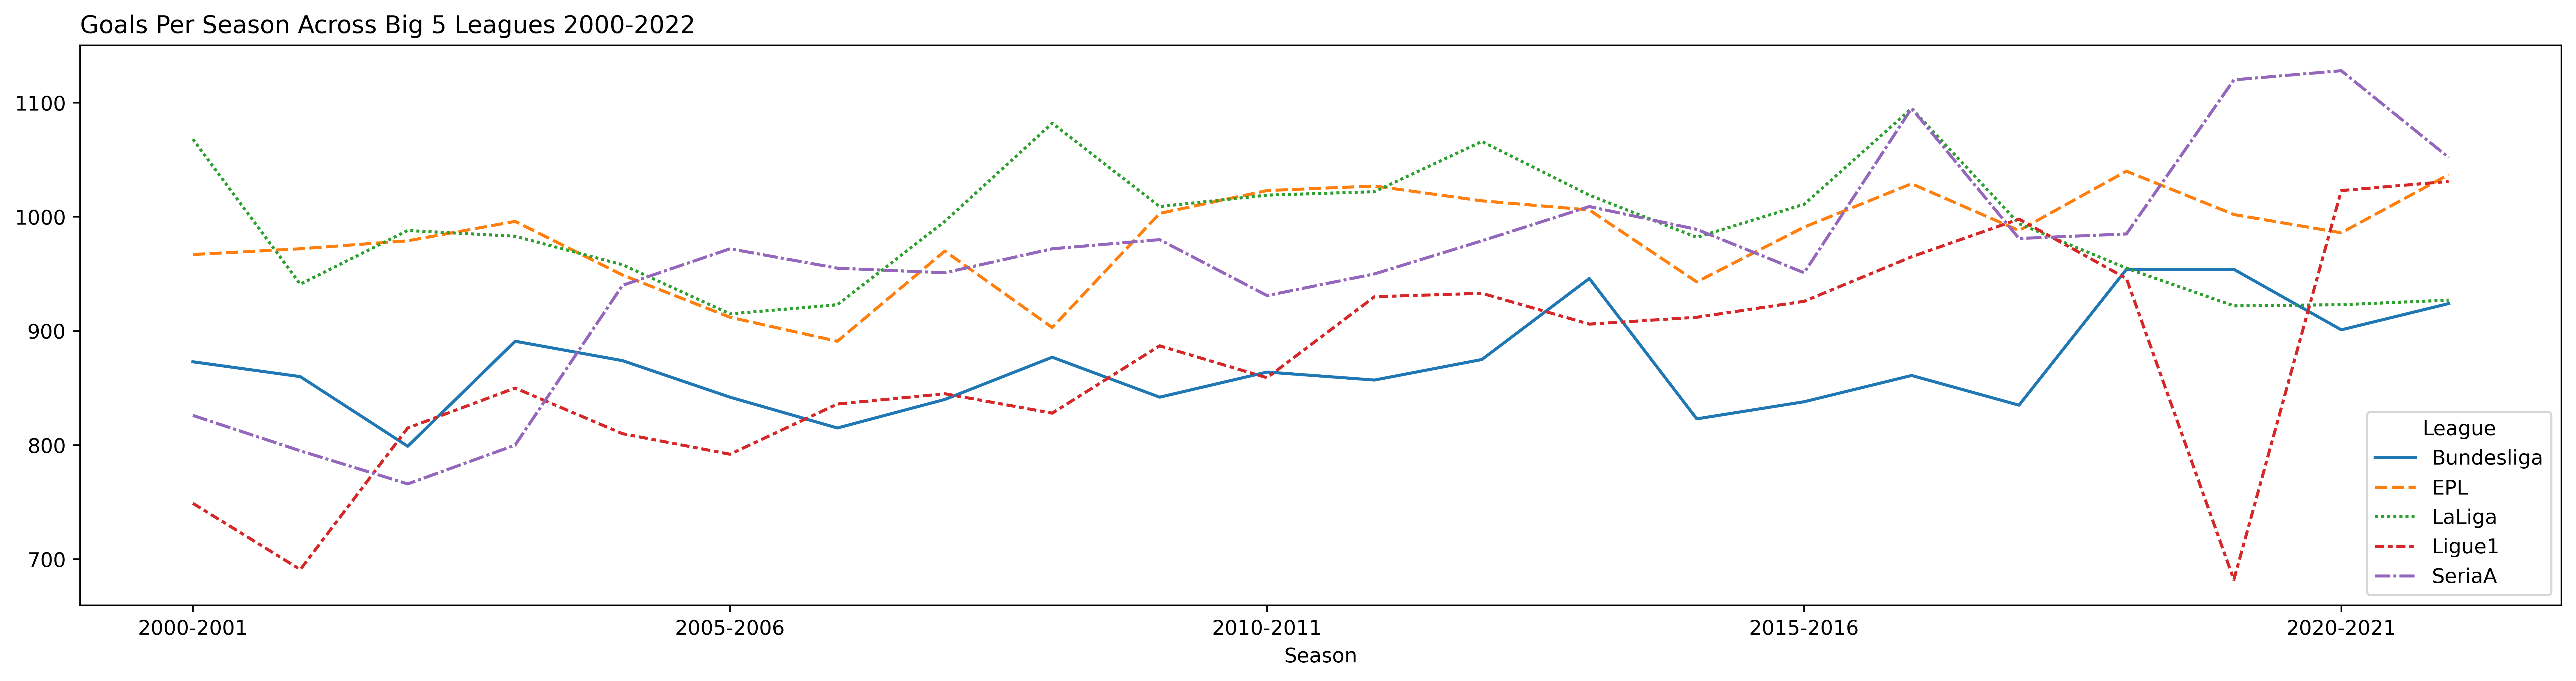

In [3]:
st = shooting[shooting['Unnamed: 0_level_0_Player'] == 'Squad Total']
top5 = ['EPL', 'Bundesliga', 'LaLiga', 'Ligue1', 'SeriaA']
goals_per_season = pd.DataFrame(st.groupby(['Season', 'League']).sum())
goals_per_season = goals_per_season.reset_index()
goals_per_season = goals_per_season[goals_per_season['League'].isin(top5)]
#using last 7 season for example including this year
goals_per_season['year_int'] = goals_per_season['Season'].apply(lambda x:  int(x.split('-')[1]))
goals_per_season_full = goals_per_season.copy()
goals_per_season_full = goals_per_season_full[goals_per_season_full['year_int'] < 2023]
goals_per_season = goals_per_season[goals_per_season['year_int'] > 2016]
goals_per_season = goals_per_season[['Season', 'League', 'Standard_Gls']]
goals_per_season

#bundesliga only has 34 games per season as opposed to 38 
bund_mult = 1.24183006536
reg_games = 38 * 7 * 20
ratios = goals_per_season.groupby('League').sum()
ratios['Gpg'] = ratios.Standard_Gls / reg_games
ratios.loc['Bundesliga'] = ratios.loc['Bundesliga'].apply(lambda x: x * bund_mult)
ratios['Gpg']
pivot_goals = pd.pivot_table(goals_per_season_full, index = 'Season', columns = 'League', values = 'Standard_Gls')
pivot = pivot_goals.reset_index()
pivot.index = pivot['Season']
fig, ax = plt.subplots(figsize=(22, 5), dpi=500)
plt.xticks(np.arange(0, 22, step=5)) 
sns.lineplot(pivot)
plt.title('Goals Per Season Across Big 5 Leagues 2000-2022', loc = 'left')

![](https://cdn.24.co.za/files/Cms/General/d/5096/3035e7a77d86492faece55f3681fa4e1.jpg)

# Single Season Awards!
### First we will look at the best performers for a single season. This allows us to see players who had great seasons and then fell off.

Text(0.0, 1.0, 'Goals per Season Distribution (Only over 5 Goals)')

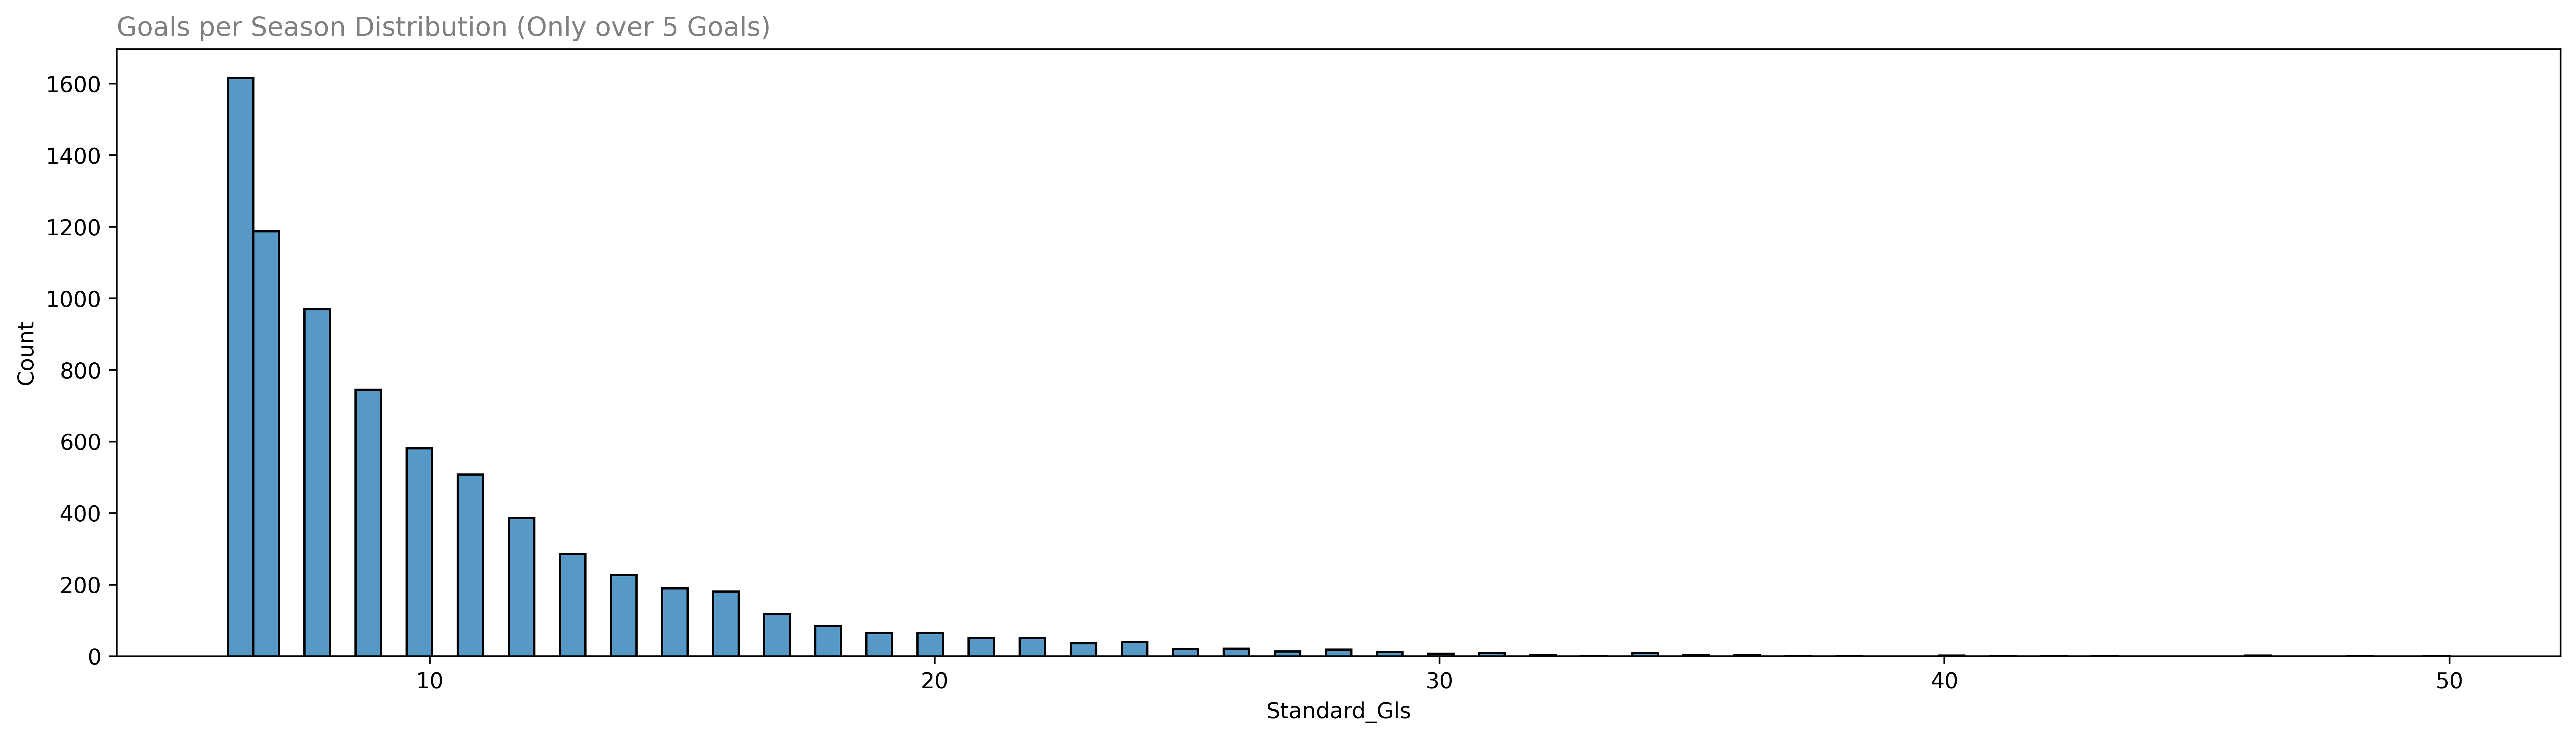

In [4]:
fig, ax = plt.subplots(figsize=(20,5), dpi=500)
store = shooting[shooting['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store = store[store['Standard_Gls'] > 5]
storing = shooting[shooting['Unnamed: 0_level_0_Player'] != 'Squad Total']
storing = storing[storing['Unnamed: 0_level_0_Player'] != 'Opponent Total']
sns.histplot(store['Standard_Gls'])
plt.title('Goals per Season Distribution (Only over 5 Goals)', loc = 'left', color = 'grey')

In [5]:
print(str(round(1 - len(storing[storing['Standard_Gls'] < 30]) / len(storing), 5)) + "% of all players over the last 23 seasons across 7 leagues have scored more than 30 goals in a domestic season")

0.00059% of all players over the last 23 seasons across 7 leagues have scored more than 30 goals in a domestic season


### First, we are going to look at the top scorers in a single domestic season. As you can see from the distribution, most players don't score any goals, and out of those who do, most score below 30. 

## In fact: .00059% of all players have scored more than 30 goals in the last 23 seasons. This amounts to 20 players.

### Two players have done it 8 times. Guess who?

In [6]:
# players who scored more than 30 goals in a domestic season
storing[storing['Standard_Gls'] > 30]['Unnamed: 0_level_0_Player'].value_counts()

Cristiano Ronaldo            8
Lionel Messi                 8
Robert Lewandowski           3
Luis Suárez                  3
Jonas                        2
Bas Dost                     2
Mateja Kežman                2
Mário Jardel                 1
Kylian Mbappé                1
Mohamed Salah                1
Edinson Cavani               1
Pierre-Emerick Aubameyang    1
Wilfried Bony                1
Gonzalo Higuaín              1
Zlatan Ibrahimović           1
Diego Forlán                 1
Klaas-Jan Huntelaar          1
Afonso Alves                 1
Luca Toni                    1
Ciro Immobile                1
Name: Unnamed: 0_level_0_Player, dtype: int64

In [7]:
# top scoring domestic seasons of all time
store = shooting[shooting['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store3 = store.sort_values('Standard_Gls', ascending = False)[['Season', 'League', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'Standard_Gls']]
store3.head(15)

,Season,League,Team,Unnamed: 0_level_0_Player,Standard_Gls
43022,2011-2012,LaLiga,Barcelona,Lionel Messi,50.0
54815,2014-2015,LaLiga,Real Madrid,Cristiano Ronaldo,48.0
42995,2011-2012,LaLiga,Real Madrid,Cristiano Ronaldo,46.0
46908,2012-2013,LaLiga,Barcelona,Lionel Messi,46.0
54788,2014-2015,LaLiga,Barcelona,Lionel Messi,43.0
6859,2001-2002,PrimeiraLiga,Sporting CP,Mário Jardel,42.0
78276,2020-2021,Bundesliga,Bayern Munich,Robert Lewandowski,41.0
58798,2015-2016,LaLiga,Barcelona,Luis Suárez,40.0
39119,2010-2011,LaLiga,Real Madrid,Cristiano Ronaldo,40.0
59386,2015-2016,Ligue1,Paris S-G,Zlatan Ibrahimović,38.0


# The Decline of the GOATs
### Cristiano Ronaldo vs Lionel Messi Goals Per Season Throughout Time

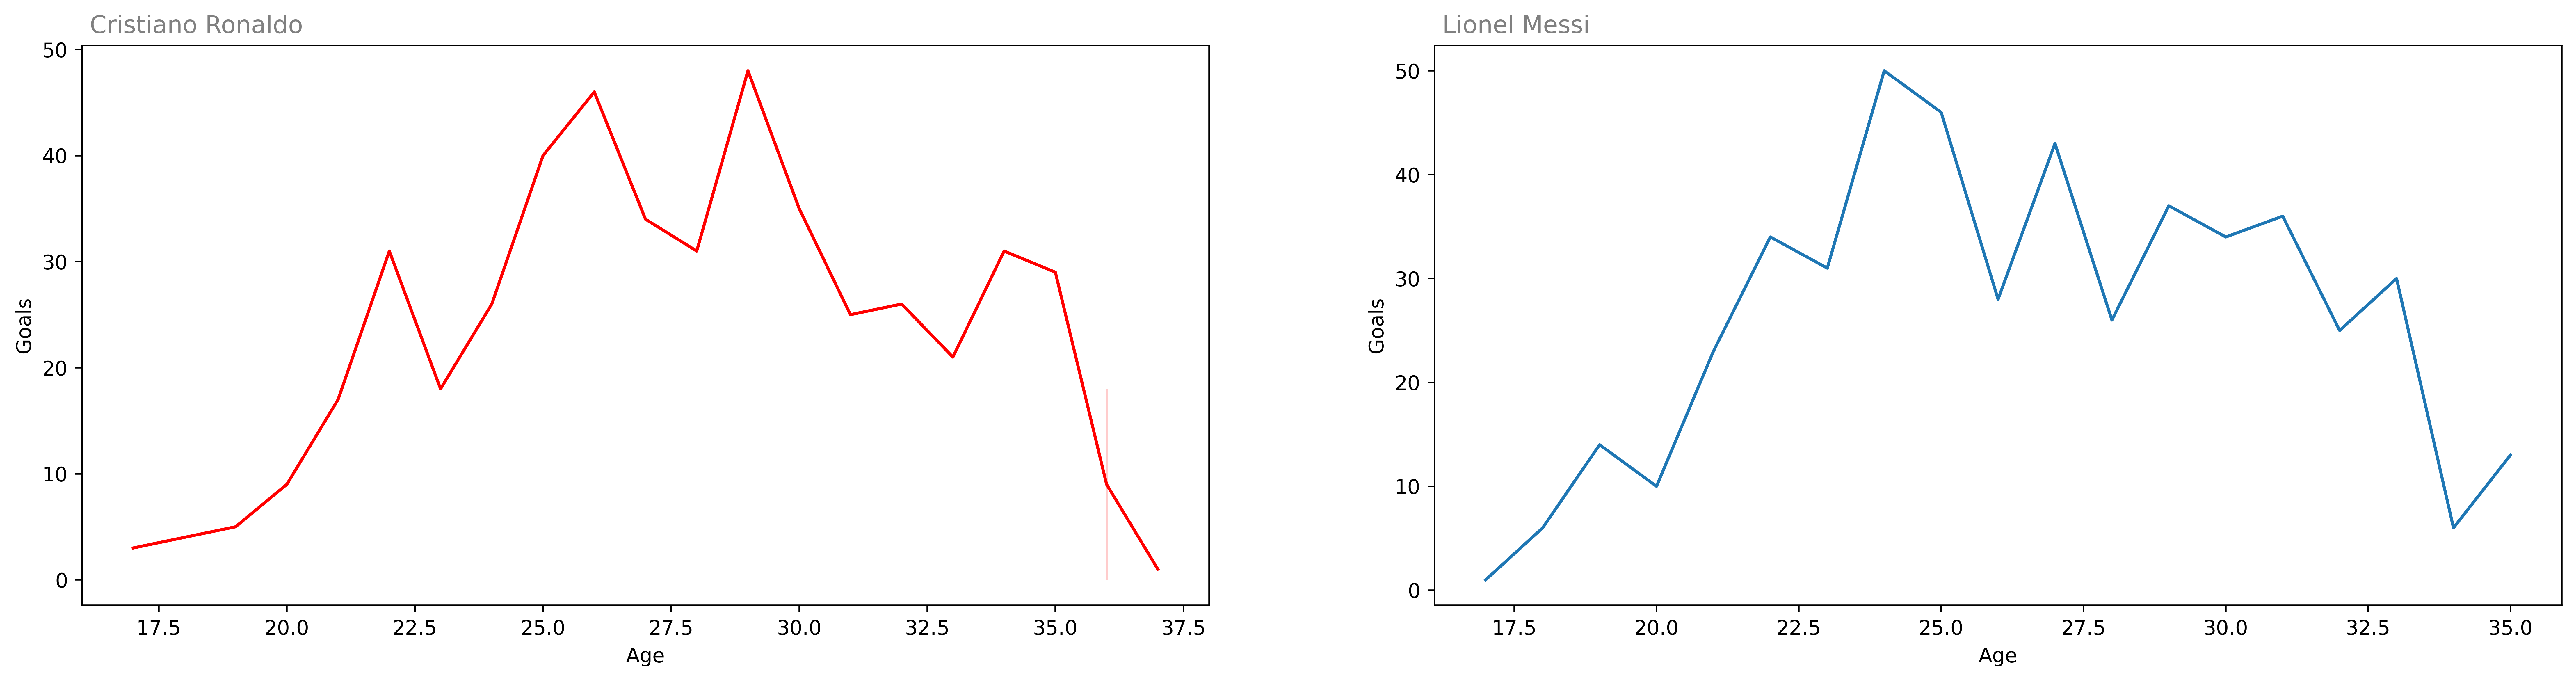

In [8]:
goat = shooting[shooting['Unnamed: 0_level_0_Player'] == 'Lionel Messi']
goat2 = shooting[shooting['Unnamed: 0_level_0_Player'] == 'Cristiano Ronaldo']
goat['Unnamed: 3_level_0_Age'][87885] = 35
goat2['Unnamed: 3_level_0_Age'][86229] = 37
fig, ax = plt.subplots(figsize=(22, 5), dpi=500)
plt.subplot(1, 2, 1)
sns.lineplot(x = goat2['Unnamed: 3_level_0_Age'], y = goat2.Standard_Gls, color = 'red')
plt.title(' Cristiano Ronaldo', loc = 'left', color = 'grey')
plt.xlabel('Age')
plt.ylabel('Goals')

plt.subplot(1, 2, 2)
sns.lineplot(x = goat['Unnamed: 3_level_0_Age'], y = goat.Standard_Gls)
plt.title(' Lionel Messi', loc = 'left', color = 'grey')
plt.xlabel('Age')
plt.ylabel('Goals')

plt.show()

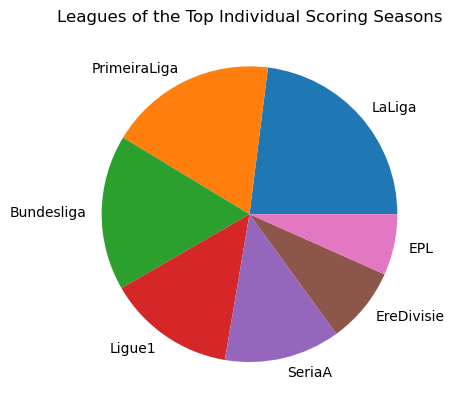

In [9]:
store = shooting[shooting['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store2 = store.sort_values('Standard_Gls', ascending = False)[['Season', 'League', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'Standard_Gls']]
store2 = store2.head(300)
plt.pie(store2['League'].value_counts(normalize = True), labels = store2['League'].unique())
plt.title("Leagues of the Top Individual Scoring Seasons")
plt.show()

 as you can see there are significantly less EPL top scoring seasons than LaLiga or Bundesliga. How much of this is due to the fact that Cristiano Ronaldo and Lionel Messi both played in La Liga is up for debate. However, this generally makes sense as the EPL is widely regarded as the most competitive of the leagues, and scoring 50 zgoals would be insane (Haaland). Similarly, the Serie A, which is known as a defensively focused league where teams sit back, has had less top scoring seasons.

### let's have a seperate column for the EPL

In [10]:
#top scoring EPL seasons

store = shooting[shooting['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['League'] == 'EPL']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store2 = store.sort_values('Standard_Gls', ascending = False)[['Season', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'Standard_Gls']].reset_index().drop('index', axis = 1)
store2.head(10)

,Season,Team,Unnamed: 0_level_0_Player,Standard_Gls
0,2017-2018,Liverpool,Mohamed Salah,32.0
1,2007-2008,Manchester Utd,Cristiano Ronaldo,31.0
2,2013-2014,Liverpool,Luis Suárez,31.0
3,2003-2004,Arsenal,Thierry Henry,30.0
4,2011-2012,Arsenal,Robin van Persie,30.0
5,2017-2018,Tottenham,Harry Kane,30.0
6,2009-2010,Chelsea,Didier Drogba,29.0
7,2016-2017,Tottenham,Harry Kane,29.0
8,2022-2023,Manchester City,Erling Haaland,28.0
9,2011-2012,Manchester Utd,Wayne Rooney,27.0


### notes: Haaland has since tied/broken this record

In [11]:
# passing dataset only avaialble from 2011->
store = passing[passing['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store1 = store.sort_values('Unnamed: 19_level_0_Ast', ascending = False)[['Season', 'League', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'Unnamed: 19_level_0_Ast']]
store1.head(15)

,Season,League,Team,Unnamed: 0_level_0_Player,Unnamed: 19_level_0_Ast
7396,2019-2020,Bundesliga,Bayern Munich,Thomas Müller,21.0
7955,2019-2020,LaLiga,Barcelona,Lionel Messi,21.0
6856,2019-2020,EPL,Manchester City,Kevin De Bruyne,20.0
18147,2021-2022,EreDivisie,Ajax,Dušan Tadić,19.0
11448,2020-2021,Bundesliga,Bayern Munich,Thomas Müller,19.0
15617,2021-2022,Bundesliga,Bayern Munich,Thomas Müller,18.0
6256,2018-2019,PrimeiraLiga,Benfica,Pizzi,18.0
13894,2020-2021,EreDivisie,Ajax,Dušan Tadić,18.0
16832,2021-2022,Ligue1,Paris S-G,Kylian Mbappé,17.0
9180,2019-2020,SeriaA,Atalanta,Papu Gómez,16.0


In [12]:
# most goals and assists since 2017 

g_a = store1.merge(store3, on = ['Unnamed: 0_level_0_Player', 'Season'])
g_a['Goals and Assists'] = g_a['Unnamed: 19_level_0_Ast'] + g_a['Standard_Gls']
g_a.sort_values(by = 'Goals and Assists', ascending = False) [['Season','Unnamed: 0_level_0_Player', 'Goals and Assists']].head(15)

,Season,Unnamed: 0_level_0_Player,Goals and Assists
37,2018-2019,Lionel Messi,49.0
572,2020-2021,Robert Lewandowski,48.0
75,2017-2018,Lionel Messi,46.0
1,2019-2020,Lionel Messi,46.0
263,2019-2020,Ciro Immobile,45.0
8,2021-2022,Kylian Mbappé,45.0
149,2017-2018,Mohamed Salah,42.0
73,2018-2019,Dušan Tadić,40.0
407,2018-2019,Kylian Mbappé,40.0
217,2020-2021,Lionel Messi,39.0



## SCA is an advanced metric that tracks the two offensive/attacking actions that directly lead to a shot on goal.
from: https://fypfanzine.uk/analysis/7403-fyp-explainer-advanced-stats-terms.html

The attacking actions can be:

* Live Passes - Passes in open play
* Dead-Ball Passes - From corners, free kicks & throw-ins
* Dribbles - Significant carry that leads to a shot
* Shots - Initial shots that lead to rebounds
* Fouls - Drawing a free-kick that leads to a shot
* Defensive Action - Clearance or tackle that leads to a shot

As an example of a SCA, a single action led to a Wilfried Zaha shot against Leicester. McArthur's through ball. McArthur receives SCA of 1.

![](https://fypfanzine.uk/images/CPFC_2122/SCA-example1.png)

### SCA is a fairly good measure of productivity from a lens other than goalscoring, which is very new to football. Here is a list of the highest SCA per 90 minutes in a season (over the last 5 seasons). These are basically the players who created the most shots or opportunities to score. 

In [13]:
store = creating[creating['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store = store[store.SCA_SCA > 50]
top5 = ['EPL', 'Bundesliga', 'LaLiga', 'Ligue1', 'SeriaA']
store = store[store['League'].isin(top5)]
store.sort_values(by = 'SCA_SCA90', ascending = False).head(20) [['Season', 'League', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'SCA_SCA90']]

,Season,League,Team,Unnamed: 0_level_0_Player,SCA_SCA90
1711,2017-2018,Ligue1,Paris S-G,Neymar,8.87
12648,2020-2021,Ligue1,Paris S-G,Neymar,8.85
3950,2018-2019,LaLiga,Barcelona,Lionel Messi,8.06
1800,2017-2018,Ligue1,Marseille,Dimitri Payet,8.01
1090,2017-2018,LaLiga,Barcelona,Lionel Messi,7.95
116,2017-2018,EPL,Chelsea,Eden Hazard,7.61
21343,2022-2023,Ligue1,Lyon,Rayan Cherki,7.59
6856,2019-2020,EPL,Manchester City,Kevin De Bruyne,7.51
101,2017-2018,EPL,Liverpool,Philippe Coutinho,7.46
9193,2019-2020,SeriaA,Atalanta,Ruslan Malinovskyi,7.39


## GCA — Goal-Creating Actions
 

Following the same logic as a Shot-Creating Action, a Goal-Creating Action is an advanced metric that tracks the two offensive/attacking actions that leads to a goal. These follow the same criteria as the above list.

Assists have been a part of football discussion for a long time, but does it paint a fair picture of what happens? Our opinion is that assists are a slightly simplistic/outdated statistic. It overvalues a final pass to a goalscorer and ignores the rest. GCA's capture more actions, which helps to paint a fuller picture from games.

For instance, if a player is fouled for a penalty, the player may get an "assist" in FPL, but the goal has no "assist" in the official stats.
Much like with SCAs, a player can be credited with two separate actions that lead to a goal and a goalscorer can receive credit for their own action that is on the way to scoring.

 

As an example of GCAs, two actions led to Christian Benteke's goal against Newcastle. Gallagher's pass to Mitchell, followed by Mitchell's cross to Benteke: 

![](https://fypfanzine.uk/images/CPFC_2122/GCA-example1.png)
![](https://fypfanzine.uk/images/CPFC_2122/GCA-example2.png)

### I find GCA to be a much worse metric than SCA just because many rather unimportant passes are awarded 1 GCA. Even in the above example, on the left, Gallagher receives a GCA of 1 for a 5 yard pass that anyone could make. Mitchell, the player who receives the pass, also earns a GCA of 1 for a contested 25 yard cross onto Bentekes head. 

In [14]:
store = creating[creating['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store = store[store.GCA_GCA > 10]
top5 = ['EPL', 'Bundesliga', 'LaLiga', 'Ligue1', 'SeriaA']
store = store[store['League'].isin(top5)]
store.sort_values(by = 'GCA_GCA90', ascending = False).head(20) [['Season', 'League', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'GCA_GCA90']]

,Season,League,Team,Unnamed: 0_level_0_Player,GCA_GCA90
1711,2017-2018,Ligue1,Paris S-G,Neymar,1.71
4543,2018-2019,Ligue1,Paris S-G,Neymar,1.50
6865,2019-2020,EPL,Manchester City,Riyad Mahrez,1.39
13305,2020-2021,SeriaA,Atalanta,Luis Muriel,1.31
2307,2017-2018,SeriaA,Juventus,Douglas Costa,1.30
101,2017-2018,EPL,Liverpool,Philippe Coutinho,1.30
1090,2017-2018,LaLiga,Barcelona,Lionel Messi,1.29
21060,2022-2023,Ligue1,Paris S-G,Lionel Messi,1.27
9164,2019-2020,SeriaA,Inter,Alexis Sánchez,1.27
7428,2019-2020,Bundesliga,Dortmund,Jadon Sancho,1.26


### As you can see, the list is similar, meaning it still articulates players who contribute to many goals over the course of a season, but it HEAVILY favors teams that score a lot, whereas SCA rewards creative players on bad teams as well. 

### The last advanced stat I want to look at is xG + xAG/90min. This stat calculates expected assists and goal contributions per 90 minutes. As you can see from the list below, it's a pretty accurate list of the best players especially when filtering out players who have only contributed to a few goals in a season.

In [15]:
store = standard[standard['Unnamed: 0_level_0_Player'] != 'Squad Total']
store = store[store['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store = store[store['Expected_npxG+xAG'] > 20]
top5 = ['EPL', 'Bundesliga', 'LaLiga', 'Ligue1', 'SeriaA']
store = store[store['League'].isin(top5)]
store.sort_values(by = 'Per 90 Minutes_xG+xAG', ascending = False).head(20) [['Season', 'League', 'Team', 
                                                                    'Unnamed: 0_level_0_Player', 'Per 90 Minutes_xG+xAG']]

,Season,League,Team,Unnamed: 0_level_0_Player,Per 90 Minutes_xG+xAG
78826,2019-2020,Ligue1,Paris S-G,Kylian Mbappé,1.49
69626,2017-2018,Ligue1,Paris S-G,Neymar,1.32
82254,2020-2021,Bundesliga,Bayern Munich,Robert Lewandowski,1.31
74113,2018-2019,Ligue1,Paris S-G,Kylian Mbappé,1.28
73463,2018-2019,LaLiga,Barcelona,Lionel Messi,1.27
68354,2017-2018,Bundesliga,Bayern Munich,Robert Lewandowski,1.26
68938,2017-2018,LaLiga,Barcelona,Lionel Messi,1.23
77489,2019-2020,Bundesliga,Bayern Munich,Robert Lewandowski,1.22
72889,2018-2019,Bundesliga,Bayern Munich,Robert Lewandowski,1.21
69007,2017-2018,LaLiga,Real Madrid,Cristiano Ronaldo,1.19


# ALL TIME AWARDS (The Third Millenium)

![height = 20px](https://ichef.bbci.co.uk/images/ic/1280xn/p0753zdp.jpg)

# Most Goals

In [16]:
# most goabsals in dataset. 
sums = shooting.copy()
sums = sums[sums['Unnamed: 0_level_0_Player'] != 'Squad Total']
sums = sums[sums['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store = sums.groupby('Unnamed: 0_level_0_Player').sum()[['Standard_Gls','Unnamed: 4_level_0_90s']].sort_values(by = 'Standard_Gls', ascending = False)
sums.groupby('Unnamed: 0_level_0_Player').sum()[['Standard_Gls','Unnamed: 4_level_0_90s']].sort_values(by = 'Standard_Gls', ascending = False).head(10)

,Standard_Gls,Unnamed: 4_level_0_90s
Unnamed: 0_level_0_Player,,
Cristiano Ronaldo,498.0,579.0
Lionel Messi,493.0,512.9
Luis Suárez,338.0,459.7
Zlatan Ibrahimović,336.0,458.9
Robert Lewandowski,327.0,363.7
Karim Benzema,273.0,425.1
Edinson Cavani,267.0,386.7
Sergio Agüero,260.0,367.3
Klaas-Jan Huntelaar,255.0,372.0


# The Best Goal to Game Ratio

In [17]:
# best goal to game ratios
store = store[store['Standard_Gls'] > 50]
store['Goal to Game Ratio'] = store['Standard_Gls']/store['Unnamed: 4_level_0_90s']
store.sort_values(by = 'Goal to Game Ratio', ascending = False).head(15)

,Standard_Gls,Unnamed: 4_level_0_90s,Goal to Game Ratio
Unnamed: 0_level_0_Player,,,
Erling Haaland,90.0,83.2,1.081731
Lionel Messi,493.0,512.9,0.961201
Kylian Mbappé,154.0,167.1,0.921604
Robert Lewandowski,327.0,363.7,0.899093
Mário Jardel,56.0,62.7,0.893142
Cristiano Ronaldo,498.0,579.0,0.860104
Afonso Alves,55.0,67.8,0.811209
Mateja Kežman,121.0,151.5,0.798680
Christian Vieri,104.0,132.8,0.783133


# Most Goals and GTG Ratios

In [18]:
store.head(15)

,Standard_Gls,Unnamed: 4_level_0_90s,Goal to Game Ratio
Unnamed: 0_level_0_Player,,,
Cristiano Ronaldo,498.0,579.0,0.860104
Lionel Messi,493.0,512.9,0.961201
Luis Suárez,338.0,459.7,0.735262
Zlatan Ibrahimović,336.0,458.9,0.732186
Robert Lewandowski,327.0,363.7,0.899093
Karim Benzema,273.0,425.1,0.642202
Edinson Cavani,267.0,386.7,0.690458
Sergio Agüero,260.0,367.3,0.707868
Klaas-Jan Huntelaar,255.0,372.0,0.685484


# Best Goal to Shot Ratio

In [19]:
# most goabsals in dataset. 
sums = shooting.copy()
sums = sums[sums['Unnamed: 0_level_0_Player'] != 'Squad Total']
sums = sums[sums['Unnamed: 0_level_0_Player'] != 'Opponent Total']
sums = sums[sums['Standard_Gls'] > 20]
sums = sums[sums['Standard_Sh'] > 40]
sums['Shot to Goal Ratio'] = sums['Standard_Gls']/sums['Standard_Sh']
sums = sums.groupby('Unnamed: 0_level_0_Player').sum()[['Shot to Goal Ratio','Standard_Sh', 'Standard_Gls']].sort_values(by = 'Shot to Goal Ratio', ascending = False)
sums.groupby('Unnamed: 0_level_0_Player').sum()[['Shot to Goal Ratio','Standard_Sh', 'Standard_Gls']].sort_values(by = 'Shot to Goal Ratio', ascending = False).head(10)

,Shot to Goal Ratio,Standard_Sh,Standard_Gls
Unnamed: 0_level_0_Player,,,
Robert Lewandowski,1.408910,820.0,191.0
Luis Suárez,1.136003,586.0,135.0
Lionel Messi,1.085014,1040.0,188.0
Karim Benzema,1.048583,557.0,116.0
Ciro Immobile,0.983368,475.0,115.0
Erling Haaland,0.926249,249.0,77.0
Cristiano Ronaldo,0.920963,1089.0,167.0
Pierre-Emerick Aubameyang,0.753907,297.0,75.0
Mohamed Salah,0.745797,529.0,99.0


# Assist Leader of Last 5 Years

In [20]:
# most goabsals in dataset. 
sums = passing.copy()
sums = sums[sums['Unnamed: 0_level_0_Player'] != 'Squad Total']
sums = sums[sums['Unnamed: 0_level_0_Player'] != 'Opponent Total']
store = sums.groupby('Unnamed: 0_level_0_Player').sum()[['Unnamed: 19_level_0_Ast','Unnamed: 4_level_0_90s']].sort_values(by = 'Unnamed: 19_level_0_Ast', ascending = False)
sums.groupby('Unnamed: 0_level_0_Player').sum()[['Unnamed: 19_level_0_Ast','Unnamed: 4_level_0_90s']].sort_values(by = 'Unnamed: 19_level_0_Ast', ascending = False).head(10)

,Unnamed: 19_level_0_Ast,Unnamed: 4_level_0_90s
Unnamed: 0_level_0_Player,,
Thomas Müller,88.0,143.2
Lionel Messi,82.0,174.4
Dušan Tadić,81.0,172.8
Kevin De Bruyne,70.0,144.1
Filip Kostić,53.0,171.0
Mohamed Salah,53.0,191.0
Joshua Kimmich,53.0,164.7
Ángel Di María,51.0,120.1
Bruno Fernandes,51.0,156.9


# Most Goals and Assists (a little broken bc Passing is only last 5y while Scoring is last 23)

In [21]:
gassists = passing.merge(shooting, on = ['Unnamed: 0_level_0_Player', 'Season'])
gassists = gassists[gassists['Unnamed: 0_level_0_Player'] != 'Squad Total']
gassists = gassists[gassists['Unnamed: 0_level_0_Player'] != 'Opponent Total']
gassists['Goals and Assists'] = gassists['Standard_Gls'] + gassists['Unnamed: 19_level_0_Ast']
gassists.groupby('Unnamed: 0_level_0_Player').sum()[['Goals and Assists']].sort_values(by = 'Goals and Assists', ascending = False).head(10)

,Goals and Assists
Unnamed: 0_level_0_Player,
Paulinho,334.0
João Pedro,253.0
Lionel Messi,226.0
Kylian Mbappé,206.0
Robert Lewandowski,204.0
Mohamed Salah,182.0
Cristiano Ronaldo,170.0
Ciro Immobile,168.0
Pierre-Emerick Aubameyang,161.0


# I may make a part two for defense, but I just wanted to make a quick analysis on this dataset. Thank you for reading!